# Car Accident Severity

*Capstone Project for IBM Data Science Professional Certificate on Coursera*

---

## Table of Contents

* Introduction / Business Problem
* Data Description
* Methodology
* Analysis
* Results and Discussion
* Conclusion


----

## 1. Introduction / Business Problem

#### Background and Problem

Each year about 1.25 million people die in road traffic accidents, and an additional 20-50 million are injured or disabled. If the locations of traffic accidents could be predicted, this could have a huge beneficial impact in potentially helping to reduce the number of accidents each year. For example, routing software could avoid the most dangerous areas - particularly in the context of the coming advent of driverless cars. It could also be useful in an insurance context, in order to predict risk, as well as for governments and local road authorities looking to create more efficient systems of road maintenance and improvements. The aim of this project is to predict where traffic accidents are likely to occur. Throughout this capstone project, multiple supervised machine learning algorithms will be explored. Then, conclusion will be made by selecting the machine learning model that provides the highest prediction accuracy.

#### Audience

The primary audience of this study might include people who resides in Seattle, WA, and those that are interested in learning about collisions provided by SPD which are recorded by Traffic Records. The findings could also be used by Department of Transportation Traffic Management Division looking to open new methods of even a way of fostering and improving traffics within Seattle to improve safety. 

## 2. Data Description

The data  includes all types of collisions. Collisions will display at the intersection or mid-block of a segment during timeframe: 2004 to Present. SDOT GIS Seattle (Dataset and Metadata) provided the data set used in this study. It contains speed, light, condition of the road, severity, etc. for road accidents from 2004 to present. The intention is to use multiple machine learning methods to forecast the severity, consideing the various road conditions. The data to be used in the sample data collection provided is called "Data-Collisions.csv" will be used. 

The data we will be using for the project is from **Seattle, Wasington, US**, named as “Data-Collisions.csv” provided by-"SDOT GIS Analyst”. It has stored data from the year 2004-Present. It is a large dataset with dimension **193673 x 38** to work on. It has a special column showing the Severity of the collision which can be used for training and predicting the model.

#### Data Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data-Collisions.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head() #Observe first 5 rows of our data

SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0           NaN         NaN      NaN         10   
1           NaN   6354039.0      NaN         11   
2           NaN   4323031.0      NaN         32   
3           NaN         NaN      NaN         23   
4           NaN   4028032.0      NaN         10   

                                          ST_COLDESC  SEGLANEKEY  \
0                                  Entering at angle           0   
1  From same direction - both going straight - bo...           0   
2                             One parked--one moving           0   
3                   From same direction - all others           0   
4                                  Entering at angle           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 38 columns]

#### Data Visualization and pre-processing

*Observing the data type*

In [5]:
df.describe(include='all')

SEVERITYCODE              X              Y       OBJECTID  \
count   194673.000000  189339.000000  189339.000000  194673.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         1.298901    -122.330518      47.619543  108479.364930   
std          0.457778       0.029976       0.056157   62649.722558   
min          1.000000    -122.419091      47.495573       1.000000   
25%          1.000000    -122.348673      47.575956   54267.000000   
50%          1.000000    -122.330224      47.615369  106912.000000   
75%          2.000000    -122.311937      47.663664  162272.000000   
max          2.000000    -122.238949      47.734142  219547.000000   

               INCKEY      COLDETKEY REPORTNO   STATUS ADDRTYPE  \
count   194673.000000  194673.000000   194673   194673   192747   
unique            NaN            NaN   194670        2        3   
top               NaN            NaN  1782439  Matched    Block   
freq              NaN            NaN        2   189786   126926   
mean    141091.456350  141298.811381      NaN      NaN      NaN   
std      86634.402737   86986.542110      NaN      NaN      NaN   
min       1001.000000    1001.000000      NaN      NaN      NaN   
25%      70383.000000   70383.000000      NaN      NaN      NaN   
50%     123363.000000  123363.000000      NaN      NaN      NaN   
75%     203319.000000  203459.000000      NaN      NaN      NaN   
max     331454.000000  332954.000000      NaN      NaN      NaN   

               INTKEY  ... ROADCOND LIGHTCOND PEDROWNOTGRNT    SDOTCOLNUM  \
count    65070.000000  ...   189661    189503          4667  1.149360e+05   
unique            NaN  ...        9         9             1           NaN   
top               NaN  ...      Dry  Daylight             Y           NaN   
freq              NaN  ...   124510    116137          4667           NaN   
mean     37558.450576  ...      NaN       NaN           NaN  7.972521e+06   
std      51745.990273  ...      NaN       NaN           NaN  2.553533e+06   
min      23807.000000  ...      NaN       NaN           NaN  1.007024e+06   
25%      28667.000000  ...      NaN       NaN           NaN  6.040015e+06   
50%      29973.000000  ...      NaN       NaN           NaN  8.023022e+06   
75%      33973.000000  ...      NaN       NaN           NaN  1.015501e+07   
max     757580.000000  ...      NaN       NaN           NaN  1.307202e+07   

       SPEEDING ST_COLCODE              ST_COLDESC     SEGLANEKEY  \
count      9333     194655                  189769  194673.000000   
unique        1        115                      62            NaN   
top           Y         32  One parked--one moving            NaN   
freq       9333      27612                   44421            NaN   
mean        NaN        NaN                     NaN     269.401114   
std         NaN        NaN                     NaN    3315.776055   
min         NaN        NaN                     NaN       0.000000   
25%         NaN        NaN                     NaN       0.000000   
50%         NaN        NaN                     NaN       0.000000   
75%         NaN        NaN                     NaN       0.000000   
max         NaN        NaN                     NaN  525241.000000   

        CROSSWALKKEY  HITPARKEDCAR  
count   1.946730e+05        194673  
unique           NaN             2  
top              NaN             N  
freq             NaN        187457  
mean    9.782452e+03           NaN  
std     7.226926e+04           NaN  
min     0.000000e+00           NaN  
25%     0.000000e+00           NaN  
50%     0.000000e+00           NaN  
75%     0.000000e+00           NaN  
max     5.239700e+06           NaN  

[11 rows x 38 columns]

In [6]:
df.shape #observe the dimensions of the data

(194673, 38)

In [8]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

##### Step 1: Things to note:

1. By observing the data, I can seprate the data I need from the unnecessary data.
2. Variable "SEVERITYCODE" is in ASCII form, so I need to explore by running frequency table.

In [9]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

The SEVERITYCODE is defined as following from the metadata.pdf: 

**Code** | **Severity**
--- | --- 
0 | unknown 
**1** | **serious damage**
**2** | **injury**
2b | serious injury
3 | fatality

##### Step 2: Checking observations that has 'NaN' 

In [10]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

##### Step 3: Finding best suitable attributes to be selected for my model

In [11]:
df.groupby(['ROADCOND','LIGHTCOND','SPEEDING','ST_COLCODE'])['SEVERITYCODE'].value_counts()

ROADCOND  LIGHTCOND                SPEEDING  ST_COLCODE  SEVERITYCODE
Dry       Dark - No Street Lights  Y         14          2               1
                                             23          1               1
                                             32          1               5
                                                         2               2
                                             50          2               7
                                                                        ..
Wet       Unknown                  Y         28          1               1
                                             30          1               1
                                             32          1               3
                                                         2               1
                                             50          1               4
Name: SEVERITYCODE, Length: 898, dtype: int64

In [12]:
df.groupby('PEDCYLCOUNT')['SEVERITYCODE'].value_counts()

PEDCYLCOUNT  SEVERITYCODE
0            1               135806
             2                53383
1            2                 4762
             1                  679
2            2                   43
Name: SEVERITYCODE, dtype: int64

## 3. Methodology

The methodology is divided into three parts:

* **Data Preparation:** presents how the dataset is obtained as well as some key aspects of the data.

* **Descriptive Statistics:** provides a brief overview of the statistics and graphs used in order to have a better understanding of the collision data. The descriptive analysis is shown in the result section.

* **K-Means:** explains the parameters and how the optimal number of cluster was obtained.



Mainly, I will create a Machine Learning model for the prediction of the severity of an accident only by getting some description data of the situation and later plan our future plan.

* First, separate between necessary data neend for model creating and training and the non essential data for the model;
* Second, remove all the NaN(not a number) values and replace them with appropriate solutions;
* Third, take care with the non accurate data types and get them back like with the date case(it's datatype is object);
* Fourth, convert the categorical data with numerical data - simple ones with just replacing commands and the difficult ones with one hot encoding method;
* Fifth, try to find some pattern by splitting the datetime into daysofweek , month and hours. directly or by plotting a graph;
* When satisfied with the data selected we will split it into train and test data;
* Train decision tree model with training and predict the test data and calculate the accuracy of our model;
* If the f1-score is satisfactory, train final model with whole data, as every data is important;

## 4. Data Analysis

### 4(a) *Pre-processing: Feature Selection and Extraction*

The Collisions Data can be splited into two parts: 

1. the accident severity predictor part
2. the location part

Create a new df named df_pred for the prediction with useful attributes:

In [13]:
df_pred = df[['OBJECTID','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','SDOT_COLCODE','INATTENTIONIND',
             'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','ST_COLCODE']].copy(deep=True)

# a initial df_pred is created....
# later some more attributes will be removed
# added deep=true so that the changes in this data will not be reflected back to our original data

In [14]:
# Take a quick overview of the data
df_pred.describe(include='all')

OBJECTID ADDRTYPE    PERSONCOUNT       PEDCOUNT    PEDCYLCOUNT  \
count   194673.000000   192747  194673.000000  194673.000000  194673.000000   
unique            NaN        3            NaN            NaN            NaN   
top               NaN    Block            NaN            NaN            NaN   
freq              NaN   126926            NaN            NaN            NaN   
mean    108479.364930      NaN       2.444427       0.037139       0.028391   
std      62649.722558      NaN       1.345929       0.198150       0.167413   
min          1.000000      NaN       0.000000       0.000000       0.000000   
25%      54267.000000      NaN       2.000000       0.000000       0.000000   
50%     106912.000000      NaN       2.000000       0.000000       0.000000   
75%     162272.000000      NaN       3.000000       0.000000       0.000000   
max     219547.000000      NaN      81.000000       6.000000       2.000000   

             VEHCOUNT    INCDTTM   SDOT_COLCODE INATTENTIONIND UNDERINFL  \
count   194673.000000     194673  194673.000000          29805    189789   
unique            NaN     162058            NaN              1         4   
top               NaN  11/2/2006            NaN              Y         N   
freq              NaN         96            NaN          29805    100274   
mean         1.920780        NaN      13.867768            NaN       NaN   
std          0.631047        NaN       6.868755            NaN       NaN   
min          0.000000        NaN       0.000000            NaN       NaN   
25%          2.000000        NaN      11.000000            NaN       NaN   
50%          2.000000        NaN      13.000000            NaN       NaN   
75%          2.000000        NaN      14.000000            NaN       NaN   
max         12.000000        NaN      69.000000            NaN       NaN   

       WEATHER ROADCOND LIGHTCOND PEDROWNOTGRNT SPEEDING ST_COLCODE  
count   189592   189661    189503          4667     9333     194655  
unique      11        9         9             1        1        115  
top      Clear      Dry  Daylight             Y        Y         32  
freq    111135   124510    116137          4667     9333      27612  
mean       NaN      NaN       NaN           NaN      NaN        NaN  
std        NaN      NaN       NaN           NaN      NaN        NaN  
min        NaN      NaN       NaN           NaN      NaN        NaN  
25%        NaN      NaN       NaN           NaN      NaN        NaN  
50%        NaN      NaN       NaN           NaN      NaN        NaN  
75%        NaN      NaN       NaN           NaN      NaN        NaN  
max        NaN      NaN       NaN           NaN      NaN        NaN

In [15]:
# looking at the data type of the df
df_pred.dtypes

OBJECTID           int64
ADDRTYPE          object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDTTM           object
SDOT_COLCODE       int64
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SPEEDING          object
ST_COLCODE        object
dtype: object

In [16]:
#shape
df_pred.shape

(194673, 16)

### *Convert to date, time, object*

In [17]:
# Convert the datetime to pandas date time format
df_pred['INCDTTM'] = pd.to_datetime(df_pred['INCDTTM'])
df_pred['INCDTTM']

0        2013-03-27 14:54:00
1        2006-12-20 18:55:00
2        2004-11-18 10:20:00
3        2013-03-29 09:26:00
4        2004-01-28 08:04:00
                 ...        
194668   2018-11-12 08:12:00
194669   2018-12-18 09:14:00
194670   2019-01-19 09:25:00
194671   2019-01-15 16:48:00
194672   2018-11-30 15:45:00
Name: INCDTTM, Length: 194673, dtype: datetime64[ns]

### *Removing the null values*

In [18]:
#checking the null values...
df_pred.isnull().sum()

OBJECTID               0
ADDRTYPE            1926
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDTTM                0
SDOT_COLCODE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
ST_COLCODE            18
dtype: int64

In [19]:
#removing null values

#lets fill the nan values with the most common element in the attribute.
df_pred['ADDRTYPE']=df_pred['ADDRTYPE'].fillna(df_pred['ADDRTYPE'].mode().iloc[0])
df_pred['UNDERINFL']=df_pred['UNDERINFL'].fillna(df_pred['UNDERINFL'].mode().iloc[0])
df_pred['WEATHER']=df_pred['WEATHER'].fillna(df_pred['WEATHER'].mode().iloc[0])
df_pred['ROADCOND']=df_pred['ROADCOND'].fillna(df_pred['ROADCOND'].mode().iloc[0])
df_pred['LIGHTCOND']=df_pred['LIGHTCOND'].fillna(df_pred['LIGHTCOND'].mode().iloc[0])
df_pred['ST_COLCODE']=df_pred['ST_COLCODE'].fillna(df_pred['ST_COLCODE'].mode().iloc[0])

#Converting nan values to 0
df_pred['INATTENTIONIND']=df_pred['INATTENTIONIND'].fillna(0)
df_pred['SPEEDING']=df_pred['SPEEDING'].fillna(0)
df_pred['PEDROWNOTGRNT']=df_pred['PEDROWNOTGRNT'].fillna(0)

In [20]:
# Checking the null values
df_pred.isnull().sum()

OBJECTID          0
ADDRTYPE          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDTTM           0
SDOT_COLCODE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
dtype: int64

### *Convert Categorical features to numerical values*

In [21]:
df_pred.describe(include='all')

OBJECTID ADDRTYPE    PERSONCOUNT       PEDCOUNT    PEDCYLCOUNT  \
count   194673.000000   194673  194673.000000  194673.000000  194673.000000   
unique            NaN        3            NaN            NaN            NaN   
top               NaN    Block            NaN            NaN            NaN   
freq              NaN   128852            NaN            NaN            NaN   
first             NaN      NaN            NaN            NaN            NaN   
last              NaN      NaN            NaN            NaN            NaN   
mean    108479.364930      NaN       2.444427       0.037139       0.028391   
std      62649.722558      NaN       1.345929       0.198150       0.167413   
min          1.000000      NaN       0.000000       0.000000       0.000000   
25%      54267.000000      NaN       2.000000       0.000000       0.000000   
50%     106912.000000      NaN       2.000000       0.000000       0.000000   
75%     162272.000000      NaN       3.000000       0.000000       0.000000   
max     219547.000000      NaN      81.000000       6.000000       2.000000   

             VEHCOUNT              INCDTTM   SDOT_COLCODE  INATTENTIONIND  \
count   194673.000000               194673  194673.000000        194673.0   
unique            NaN               162058            NaN             2.0   
top               NaN  2006-11-02 00:00:00            NaN             0.0   
freq              NaN                   96            NaN        164868.0   
first             NaN  2004-01-01 00:00:00            NaN             NaN   
last              NaN  2020-05-20 00:00:00            NaN             NaN   
mean         1.920780                  NaN      13.867768             NaN   
std          0.631047                  NaN       6.868755             NaN   
min          0.000000                  NaN       0.000000             NaN   
25%          2.000000                  NaN      11.000000             NaN   
50%          2.000000                  NaN      13.000000             NaN   
75%          2.000000                  NaN      14.000000             NaN   
max         12.000000                  NaN      69.000000             NaN   

       UNDERINFL WEATHER ROADCOND LIGHTCOND  PEDROWNOTGRNT  SPEEDING  \
count     194673  194673   194673    194673       194673.0  194673.0   
unique         4      11        9         9            2.0       2.0   
top            N   Clear      Dry  Daylight            0.0       0.0   
freq      105158  116216   129522    121307       190006.0  185340.0   
first        NaN     NaN      NaN       NaN            NaN       NaN   
last         NaN     NaN      NaN       NaN            NaN       NaN   
mean         NaN     NaN      NaN       NaN            NaN       NaN   
std          NaN     NaN      NaN       NaN            NaN       NaN   
min          NaN     NaN      NaN       NaN            NaN       NaN   
25%          NaN     NaN      NaN       NaN            NaN       NaN   
50%          NaN     NaN      NaN       NaN            NaN       NaN   
75%          NaN     NaN      NaN       NaN            NaN       NaN   
max          NaN     NaN      NaN       NaN            NaN       NaN   

       ST_COLCODE  
count      194673  
unique        115  
top            32  
freq        27630  
first         NaN  
last          NaN  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [22]:
df_pred.dtypes

OBJECTID                   int64
ADDRTYPE                  object
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT             object
SPEEDING                  object
ST_COLCODE                object
dtype: object

The ASCII type for **ADDRTYPE** are: 

**ADDRTYPE** | **CODE**
--- | --- 
Block | 0 
Intersection | 1
Alley | 2

In [23]:
#data labeling
df_pred['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[0,1,2],inplace=True)
df_pred['INATTENTIONIND'].replace(to_replace='Y', value=1,inplace=True)
df_pred['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df_pred['UNDERINFL']=df_pred['UNDERINFL'].astype(dtype='int64')
df_pred['PEDROWNOTGRNT'].replace(to_replace='Y', value=1,inplace=True)
df_pred['SPEEDING'].replace(to_replace='Y', value=1,inplace=True)

#for colcode
df_pred['ST_COLCODE'].replace(to_replace=' ', value=np.nan,inplace=True)
df_pred['ST_COLCODE'].fillna(method='ffill', inplace = True)
df_pred['ST_COLCODE']=df_pred['ST_COLCODE'].astype(dtype='int64')

In [24]:
df_pred['SEVERITYCODE'] = df['SEVERITYCODE'].copy(deep=True)

In [25]:
df_pred.dtypes

OBJECTID                   int64
ADDRTYPE                   int64
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND             int64
UNDERINFL                  int64
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT              int64
SPEEDING                   int64
ST_COLCODE                 int64
SEVERITYCODE               int64
dtype: object

##### Split Date Time into days of week, months, and hours

In [26]:
df_pred['DAYOFWEEK'] = df_pred['INCDTTM'].dt.dayofweek
df_pred['MONTH'] = df_pred['INCDTTM'].dt.month
df_pred['HOUR'] = df_pred['INCDTTM'].dt.hour
df_pred.head()

OBJECTID  ADDRTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  \
0         1         1            2         0            0         2   
1         2         0            2         0            0         2   
2         3         0            4         0            0         3   
3         4         0            3         0            0         3   
4         5         1            2         0            0         2   

              INCDTTM  SDOT_COLCODE  INATTENTIONIND  UNDERINFL   WEATHER  \
0 2013-03-27 14:54:00            11               0          0  Overcast   
1 2006-12-20 18:55:00            16               0          0   Raining   
2 2004-11-18 10:20:00            14               0          0  Overcast   
3 2013-03-29 09:26:00            11               0          0     Clear   
4 2004-01-28 08:04:00            11               0          0   Raining   

  ROADCOND                LIGHTCOND  PEDROWNOTGRNT  SPEEDING  ST_COLCODE  \
0      Wet                 Daylight              0         0          10   
1      Wet  Dark - Street Lights On              0         0          11   
2      Dry                 Daylight              0         0          32   
3      Dry                 Daylight              0         0          23   
4      Wet                 Daylight              0         0          10   

   SEVERITYCODE  DAYOFWEEK  MONTH  HOUR  
0             2          2      3    14  
1             1          2     12    18  
2             1          3     11    10  
3             1          4      3     9  
4             2          2      1     8

##### Observing newly formatted attributes and SEVERTIYCODE

In [27]:
df_pred.groupby(['MONTH','DAYOFWEEK'])['SEVERITYCODE'].value_counts().head(50)

MONTH  DAYOFWEEK  SEVERITYCODE
1      0          1               1501
                  2                624
       1          1               1879
                  2                720
       2          1               1684
                  2                728
       3          1               1842
                  2                782
       4          1               1955
                  2                785
       5          1               1574
                  2                598
       6          1               1269
                  2                466
2      0          1               1362
                  2                548
       1          1               1452
                  2                604
       2          1               1609
                  2                616
       3          1               1490
                  2                669
       4          1               1729
                  2                675
       5          1              

In [28]:
df_pred.groupby(['HOUR'])['SEVERITYCODE'].value_counts().head()

HOUR  SEVERITYCODE
0     1               25129
      2                9252
1     1                2577
      2                 831
2     1                2736
Name: SEVERITYCODE, dtype: int64

### 4(b): *Plot Visualization*

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

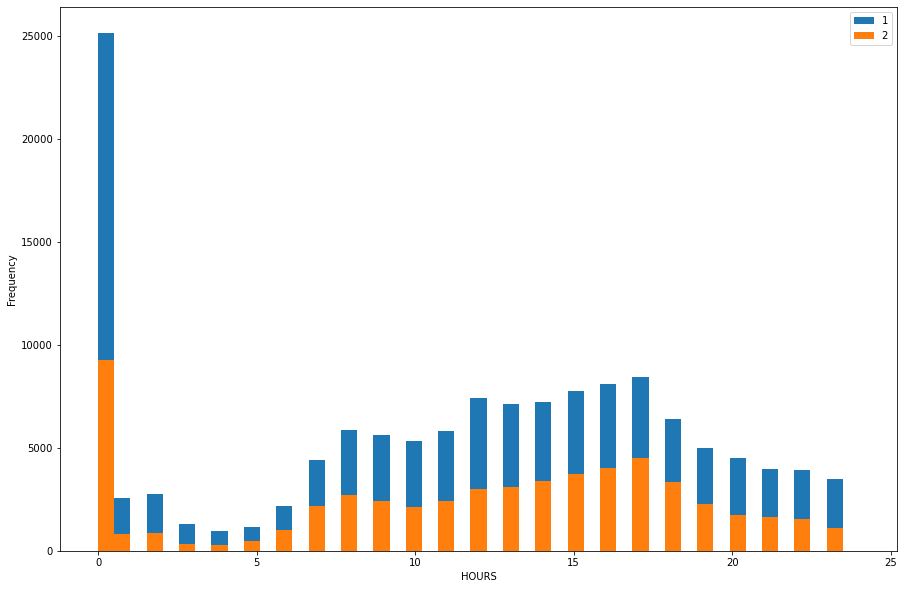

In [31]:
df_pred.groupby('SEVERITYCODE')['HOUR'].plot(kind='hist',bins=np.linspace(0,24,48), figsize=(15,10),
                                            legend=True)
plt.xlabel("HOURS")
plt.show()

**Based on histogram above, data shows that the accident is more likely to occur at 00:00. the percentage of accident is very low from 1:00 to 7:00 and 19:00 to 23:00.**

Therefore, create a group with a threshold of 5000 for severity 1

*i.e 00:00 and 8:00-18:00 is 1 other is 0*

In [32]:
df_pred['HOUR_GP']= df_pred['HOUR'].apply(lambda x: 1 if (x>7 and x<19) or (x==0)  else 0)

In [33]:
df_pred[['HOUR','HOUR_GP']]

HOUR  HOUR_GP
0         14        1
1         18        1
2         10        1
3          9        1
4          8        1
...      ...      ...
194668     8        1
194669     9        1
194670     9        1
194671    16        1
194672    15        1

[194673 rows x 2 columns]

In [34]:
df_pred.groupby(['HOUR_GP'])['SEVERITYCODE'].value_counts()

HOUR_GP  SEVERITYCODE
0        1                36182
         2                14270
1        1               100303
         2                43918
Name: SEVERITYCODE, dtype: int64

### 4(c): *Checking weather, road condition, light condition, and speeding*

In [35]:
df_pred.groupby(['WEATHER','ROADCOND','LIGHTCOND','SPEEDING'])['SEVERITYCODE'].value_counts().head(50)

WEATHER            ROADCOND    LIGHTCOND                 SPEEDING  SEVERITYCODE
Blowing Sand/Dirt  Dry         Dark - No Street Lights   0         1                   1
                               Dark - Street Lights On   0         2                   5
                                                                   1                   4
                               Dawn                      0         2                   1
                               Daylight                  0         1                  16
                                                                   2                   3
                               Dusk                      0         1                   2
                               Unknown                   0         1                   1
                   Ice         Dark - Street Lights On   0         1                   1
                               Daylight                  0         1                   3
                              

In [36]:
df_pred.groupby(['SDOT_COLCODE','ST_COLCODE'])['SEVERITYCODE'].value_counts()

SDOT_COLCODE  ST_COLCODE  SEVERITYCODE
0             0           2               80
                          1               25
              1           2               26
                          1                7
              2           2               33
                                          ..
69            45          2               61
                          1                1
              48          2                1
              52          2                4
              53          2                1
Name: SEVERITYCODE, Length: 909, dtype: int64

### 4(d): *Feature Selection*

Remove some attributes which does not show any distinct patterns and others that could create a mess in the classifier.

In [37]:
df_pred.dtypes

OBJECTID                   int64
ADDRTYPE                   int64
PERSONCOUNT                int64
PEDCOUNT                   int64
PEDCYLCOUNT                int64
VEHCOUNT                   int64
INCDTTM           datetime64[ns]
SDOT_COLCODE               int64
INATTENTIONIND             int64
UNDERINFL                  int64
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT              int64
SPEEDING                   int64
ST_COLCODE                 int64
SEVERITYCODE               int64
DAYOFWEEK                  int64
MONTH                      int64
HOUR                       int64
HOUR_GP                    int64
dtype: object

In [38]:
features= df_pred[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','ST_COLCODE','SDOT_COLCODE','INATTENTIONIND',
                 'UNDERINFL','PEDROWNOTGRNT','SPEEDING','HOUR_GP']].copy(deep=True)

Now, convert categorical variables to binary variables and append them to the feature Data Frame: 

In [39]:
features = pd.concat([features,pd.get_dummies(df_pred['WEATHER'])], axis=1)
features.drop(['Unknown','Other'], axis = 1,inplace=True)
features = pd.concat([features,pd.get_dummies(df_pred['ROADCOND'])], axis=1)
features.drop(['Unknown','Other'], axis = 1,inplace=True)
features = pd.concat([features,pd.get_dummies(df_pred['LIGHTCOND'])], axis=1)
features.drop(['Unknown','Other'], axis = 1,inplace=True)
features.head()

ADDRTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  ST_COLCODE  \
0         1            2         0            0         2          10   
1         0            2         0            0         2          11   
2         0            4         0            0         3          32   
3         0            3         0            0         3          23   
4         1            2         0            0         2          10   

   SDOT_COLCODE  INATTENTIONIND  UNDERINFL  PEDROWNOTGRNT  ...  Snow/Slush  \
0            11               0          0              0  ...           0   
1            16               0          0              0  ...           0   
2            14               0          0              0  ...           0   
3            11               0          0              0  ...           0   
4            11               0          0              0  ...           0   

   Standing Water  Wet  Dark - No Street Lights  Dark - Street Lights Off  \
0               0    1                        0                         0   
1               0    1                        0                         0   
2               0    0                        0                         0   
3               0    0                        0                         0   
4               0    1                        0                         0   

   Dark - Street Lights On  Dark - Unknown Lighting  Dawn  Daylight  Dusk  
0                        0                        0     0         1     0  
1                        1                        0     0         0     0  
2                        0                        0     0         1     0  
3                        0                        0     0         1     0  
4                        0                        0     0         1     0  

[5 rows x 35 columns]

Data is now ready with all the best attributes converted to numeric data for the classifier.

In [40]:
X=features
X[0:5]

ADDRTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  ST_COLCODE  \
0         1            2         0            0         2          10   
1         0            2         0            0         2          11   
2         0            4         0            0         3          32   
3         0            3         0            0         3          23   
4         1            2         0            0         2          10   

   SDOT_COLCODE  INATTENTIONIND  UNDERINFL  PEDROWNOTGRNT  ...  Snow/Slush  \
0            11               0          0              0  ...           0   
1            16               0          0              0  ...           0   
2            14               0          0              0  ...           0   
3            11               0          0              0  ...           0   
4            11               0          0              0  ...           0   

   Standing Water  Wet  Dark - No Street Lights  Dark - Street Lights Off  \
0               0    1                        0                         0   
1               0    1                        0                         0   
2               0    0                        0                         0   
3               0    0                        0                         0   
4               0    1                        0                         0   

   Dark - Street Lights On  Dark - Unknown Lighting  Dawn  Daylight  Dusk  
0                        0                        0     0         1     0  
1                        1                        0     0         0     0  
2                        0                        0     0         1     0  
3                        0                        0     0         1     0  
4                        0                        0     0         1     0  

[5 rows x 35 columns]

In [41]:
y=df['SEVERITYCODE'].values
y[:5]

array([2, 1, 1, 1, 2], dtype=int64)

### 4(e): *Normalizing Data*

In [42]:
from sklearn import preprocessing

In [43]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:1]

array([[ 1.36398593, -0.33020207, -0.18743029, -0.16958841,  0.12553783,
        -0.88333125, -0.41751024, -0.42518348, -0.2217116 , -0.1567239 ,
        -0.22440165,  0.59145941, -0.01696304, -1.21707436, -0.05414257,
         2.45445634, -0.00506801, -0.45298634, -0.011333  , -0.02409974,
        -0.06841713, -1.4099744 , -0.07905204, -0.01813462, -0.01963186,
        -0.07200071, -0.02431221,  1.76085874, -0.08920831, -0.07872239,
        -0.576075  , -0.00751719, -0.1141037 ,  0.77768637, -0.17682024]])

### 4(f): *Model Creation*

**Spliting our data into train and test set**: spliting in training and testing set helps us to evaluate the model using unknown data and check the accuracy.

In [45]:
#impoting the useful lib from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [46]:
x_train , x_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=3)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (155738, 35) (155738,)
Test set: (38935, 35) (38935,)


**Use Decision Tree for model creation and prediction**

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Create a model
dt = DecisionTreeClassifier(criterion="entropy")

In [49]:
# fit the values
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [50]:
# Predict
yhat= dt.predict(x_test)

**Scoring the model:**

In [51]:
from sklearn.metrics import f1_score

In [52]:
f1s = f1_score(y_test,yhat)

In [53]:
print("The f1 score of the Decision Tree Model is --> ",f1s)

The f1 score of the Decision Tree Model is -->  0.8308808639892001


**F1 score is 0.831** - Our model is good. 

In [54]:
# Test Data training
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [55]:
#just for cheking
print("final f1 score of our model is ---->",f1_score(y[200:20000],dt.predict(X[200:20000])))

final f1 score of our model is ----> 0.8636318358402232


Based on Decision Tree Methodology, the **final f1 score is 0.8636**

## 5. Result

From above methodology and data analysis, I could state that the data performed very well with both known and the unknown data.

* The model shows a **0.831** f1 score on **unknown data**;
* The model shows a **0.8638** f1 score on **known data**;

So, this model can be used to predict the accident severity just by giving the necessary data and the model will predict the severity for them. A lot of possible casualties and loss of property and life can be minimized by taking precaution measures.

## 6. Discussion 

The data was well collected and stored. The data was more than enough to predict the severity. So anyone living in Seattle or someone who is planning to visit can formally use this model to predict the accident severity of that place. They can plan their travel accordingly and mark the safe and unsafe areas. Even more attributes could be used to predict the data but they were not precise enough to come up with statistical conclusion. And even selecting more data will make our model too biased for our data plus start predicting the noise. While analyzing the data the months and days of week had not much difference to the collisions, they were just consistent and that's why they were dropped as we need a pattern to predict the right model. Adding average data will just put load on our machine.

In a future study, categories should be further tested and refined. They were constructed based on previously published literature. However, a preliminary analysis should have been performed to choose the categories that can be determinants of life expectancy. In addition to the categories used here, there can be categories of venues a positive effect on mental health, thus prolonging life, such as arts & entertainment places and spiritual center. Types of restaurants can also be considered. There can also be categories of venues that could adversely affect life expectancy that would need to be taken into account such as cigarette shops and liquor stores. The categories included in this study are still quite comprehensive as I used as many as possible from all the Foursquare categories.

Using Foursquare also presented a few challenges. There can also be redundancy in counting the venues of each category in this study. Although users do report duplicate listings, some can still exist, especially since different branches, departments, and sometimes even each hole of a golf course can have their own listings on Foursquare and counted as separate venues. Along with the fact that there are many more venues in areas with denser population, it is possible that the number of resources in the communities with many resources were over-represented. Some venues may not appear on Foursquare because of a number of reasons such as being newly opened or having some changes. There can also be a few that were missed especially in sports facilities category because there can be facilities that can only be categorized as ‘athletics & sports’ and not as any specific sports venue. However, I felt that these discrepancies are not enough to throw the whole picture.

## 7. Conclusion

Purpose of this model was to create a model that can predict the accident severity just by knowing the basic component of that place. My analysis clearly shows that this data was excellent data which helped our data to achieve a final f1 score of 86.36%. So anyone living in Seattle or someone who is planning to visit can formally use this model to predict the accident severity of that place. They can plan their journey accordingly and mark the safe and unsafe areas further planning depends on them. This model not only will help the general public, but other concerned authorities could also see this and find the areas that are red zones at particular and save precious lives . they can even put the barricades to alert the upcoming traffic. Other concerned authorities who keep the condition of road and light could mark the places which have problems and solve them.

Final decision on journey planning will be made by public based on specific characteristics of that location and past history of collision. Stakeholders should improve the infrastructure of those communities to bring in those resources. In addition, communities with low number of resources but high collisions should be studied to see what sets them apart.